# Model Evaluation
- Evaluate the best Model by choosing between different Model types, Tuning parameters, and selecting Features
- Select the right **Model evaluation metric** to quantify the Model performance

<hr>

## Model Evaluation Procedures:
1. Train/Test Split:
    - Good estimate of out-of-sample performance, but with high variance
    - Fast, simple, and flexible
2. K-fold Cross-Validation:
    - Better estimate of out-of-sample performance
    - "K" times slower than Train/Test split

## Model Evaluation Metric:
1. Regression problems:
    - Mean Absolute Error (MAE)
    - Mean Squared Error (MSE)
    - Root Mean Squared Error (RMSE)
2. Classification problems:
    - Classification Accuracy

<hr>

# Load Data and Modules
- Using locally saved copy of **Pima Indian Diabetes** dataset from the *UCI Machine Learning Repository* from kaggle

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Read the data into a Pandas DataFrame
pima = pd.read_csv("Data/diabetes.csv")
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Change the names of the columns
pima.columns = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
pima.shape

(768, 9)

- Label is used to indicate if the patient has diabetes (1) or no diabetes (0)
- Predict diabetes status given patient's health measurements

<hr>

# Classification Accuracy
- Using **Classification Accuracy** as evaluation metric
- Using **Train/Test Split** as evaluation procedure

## 1. Get the data and define X and y
- For Features using only **pregnant**, **insulin**, **bmi**, and **age** Variables

In [5]:
# Define X and y
feature_cols = ['pregnant', 'insulin', 'bmi', 'age']
X = pima[feature_cols]
y = pima.label

## 2. Data Partition using Train/Test Split

In [6]:
# Import the module to Split the data into Training and Testing
from sklearn.model_selection import train_test_split

# Split by 25% Testing, 75% Training (default parameters)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## 3. Train the Model on the Training Set

In [7]:
# Import the class module
from sklearn.linear_model import LogisticRegression

# Initiate the Model
logreg = LogisticRegression()

# Fit the Model on Training Set
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## 4. Predict on the Testing Set

In [8]:
# Predict on new testing data
y_pred = logreg.predict(X_test)

## 5. Classification Accuracy: percentage of correct predictions

In [9]:
# Import metrics module to check accuracy
from sklearn import metrics

metrics.accuracy_score(y_test, y_pred)

0.69270833333333337

- Classification Accuracy of 69%

### Comapre to Benchmark Accuracy - *Null Accuracy*
- Predict the most frequent class

In [10]:
# Look at the distribution of the testing set 
y_test.value_counts()

0    130
1     62
Name: label, dtype: int64

In [11]:
# Calculate the precentage of ones
y_test.mean()  # Same as 62/192

0.32291666666666669

In [12]:
# Calculate the precentage of zeros
1 - y_test.mean()

0.67708333333333326

- 68% is the Null Accuracy for this problem.  Beanchmark baseline Accuracy is at 68%

In [13]:
# Claculate Null Accuracy for Binary Classification in one step
max(y_test.mean(), 1 - y_test.mean())

0.67708333333333326

In [14]:
# Claculate Null Accuracy for Multi-class Classification in one step (only works for Pandas Series)
y_test.value_counts().head(1) / len(y_test)

0    0.677083
Name: label, dtype: float64

#### Conclusion:
- **Classification Accuracy** is an easy metric to understand
- However, it does not tell the underlying distribution of response values, and the types of errors

<hr>

# Confusion Matrix
- 2x2 NumPy array that describes the performance of a classification model

In [15]:
# First argument has to the the ACTUAL values, second argument is the PREDICTED values
metrics.confusion_matrix(y_test, y_pred)

array([[118,  12],
       [ 47,  15]])

|                 |  Predicted 0:    |  Predicted 1:     |
|-----------------|------------------|                   |
|  **Actual 0:**  |  118             |  12               | 
|  **Actual 1:**  |  47              |  15               |

- **True Positive (TP)**: *correctly* predicted *positive*
- **True Negative (TN)**: *correctly* predicted *negative*
- **False Positive (FP)**: *incorrectly* predicted *positive* - "Type I Error"
- **False Negative (FN)**: *incorrectly* predicted *negative* - "Type II Error"

|       |  (-)  |  (+)  |
|-------|---------------|
|  **(-)**  |  TN   |  FP   | 
|  **(+)**  |  FN   |  TP   | 

In [16]:
# Save Confusion Matrix values 
confusion = metrics.confusion_matrix(y_test, y_pred)
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

## Metrics from Confusion Matrix

### Classification Accuracy: How accurate is the classifier

In [17]:
print((TP + TN) / (TP + FP + FN + TN))
print(metrics.accuracy_score(y_test, y_pred))

0.692708333333
0.692708333333


### Classification Error: How often is the classifier incorrect

In [18]:
print((FP + FN) / (TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_pred))

0.307291666667
0.307291666667


### Sensitivity: P(Positive Test | Disease): Also known as *"Recall"* and *"True Positive Rate"*

In [19]:
print(TP / (TP + FN))
print(metrics.recall_score(y_test, y_pred))

0.241935483871
0.241935483871


### Specificity: P(Negative Test | No Disease): How *selective* is the classifier in predicting positive instances

In [20]:
print(TN / (FP + TN))

0.907692307692


### False Positive Rate: When Actual value is *Negative*, how often is the prediction incorrect
- 1 - Specificity

In [21]:
print(FP / (TN + FP))

0.0923076923077


### Positive Predictive Value: P(Disease | Positive Test) also known as *Precision*

In [22]:
print(TP / (TP + FP))

0.555555555556


### Negative Predictive Value: P(No Disease | Negative Test)

In [23]:
print(TN / (FN + TN))

0.715151515152


## Which metric to choose:
- **Spam filter**: Optimize **Precision** or **Specificity** because *false negative* are more acceptable than *false positive*
- **Fraud detector**: Optimize for **Sensitivity**  because *false positive* are more acceptable than *false negatives*

<hr>

# Adjusting the Classification Threshold

In [24]:
# Look at the firs 10 predicted responses
y_pred = logreg.predict(X_test)
y_pred[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [25]:
# Look at the first 10 probabilities for the predicted responses
# 2 Columns represent 2 possible response classes: 0 (left column) or 1 (right column)
y_prob = logreg.predict_proba(X_test)
y_prob[0:10, :]

array([[ 0.63247571,  0.36752429],
       [ 0.71643656,  0.28356344],
       [ 0.71104114,  0.28895886],
       [ 0.5858938 ,  0.4141062 ],
       [ 0.84103973,  0.15896027],
       [ 0.82934844,  0.17065156],
       [ 0.50110974,  0.49889026],
       [ 0.48658459,  0.51341541],
       [ 0.72321388,  0.27678612],
       [ 0.32810562,  0.67189438]])

In [26]:
# Look at first 10 predicted probabilities for class 1 (predicted value of 1)
y_prob[0:10, 1]

array([ 0.36752429,  0.28356344,  0.28895886,  0.4141062 ,  0.15896027,
        0.17065156,  0.49889026,  0.51341541,  0.27678612,  0.67189438])

In [27]:
# Store all of the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

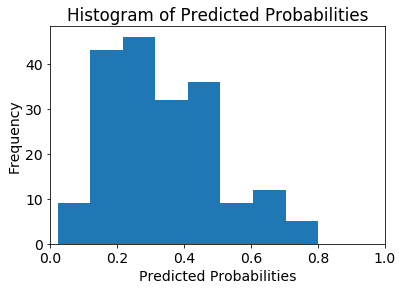

In [28]:
# Look at the Histrogram plot of the probabilities
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = 14

plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title("Histogram of Predicted Probabilities")
plt.xlabel("Predicted Probabilities")
plt.ylabel("Frequency")

- Default threshold is at 0.5
- Class 1 is rarely predicted because most of the observations are below the 0.5 threshold

## *Decrease* the *Threshold* in order to *increase* the *Sensitivity* of the classifier
- Classifier is *more sensitive* to positive instances

In [29]:
# Predict diabetes if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], 0.3)[0]

In [30]:
# Look at the first 10 predicted probabilities
y_pred_prob[1:10]

array([ 0.28356344,  0.28895886,  0.4141062 ,  0.15896027,  0.17065156,
        0.49889026,  0.51341541,  0.27678612,  0.67189438])

In [31]:
# Look at the first 10 predicted classes with the lower threshold
y_pred_class[0:10]

array([ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  1.])

- Class 1 predictions increased to 5 instances

In [32]:
# Look at the confusion matrix with threshold at 0.5
confusion

array([[118,  12],
       [ 47,  15]])

In [33]:
# Look at the new confusion matrix with threshold at 0.3
metrics.confusion_matrix(y_test, y_pred_class)

array([[80, 50],
       [16, 46]])

In [34]:
# Sensitivity has increased (used to be 0.24)
print(46 / (46 + 16))

0.7419354838709677


In [35]:
# Specificity has decreased (used to be 0.91)
print(80 / (80 + 50))

0.6153846153846154


## Conclusion:
- Default threshold is 0.5 for binary problems
- Can be adjusted to increase sensitivity or precificity (inverse relationship)

<hr>

# ROC Curves and Area Under the Curve (AUC)
- Look at how **Specificity** and **Sensitivity** are affected by different thresholds

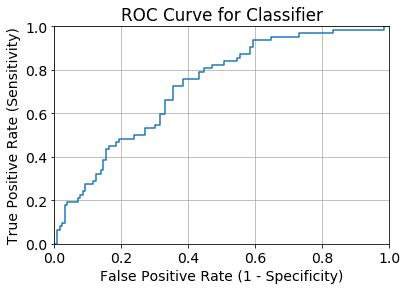

In [36]:
# Using roc_curve function from metrics module
# Pass in actual values (y_test) and predicted probabilities (y_pred_prob) for class 1
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title("ROC Curve for Classifier")
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.grid(True)

- Use **ROC Curve** to choose a balance between **Specificity** and **Sensitivity**
- Can't see the threshold used to generate the plot
- Example: To get **Sensitivity** of 0.9, need to accept **False Positive Rate** of 0.6

In [39]:
# Function to see how threshold affects Specificity and Sensitivity
def evaluate_threshold(threshold):
    print("Sensitivity: ", tpr[thresholds > threshold][-1])
    print("Specificity: ", 1 - fpr[thresholds > threshold][-1])

In [41]:
# Look at default threshold
evaluate_threshold(0.5)

Sensitivity:  0.241935483871
Specificity:  0.907692307692


In [42]:
# Look at threshold of 0.3
evaluate_threshold(0.3)

Sensitivity:  0.725806451613
Specificity:  0.615384615385


## Area Under the Curve (AUC)
- **AUC** is the percentage of the **ROC** plot that is *under the curve*
- Ideal classifier would have **AUC = 1**
- Higher **AUC** is a better classifier
- Useful as a single number summary of classifier

In [44]:
# Look at the AUC
metrics.roc_auc_score(y_test, y_pred_prob)

0.72456575682382129

In [45]:
# AUC is available as a scoring option in cross_val_score
from sklearn.cross_validation import cross_val_score
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

0.73782336182336183

<hr>

## Confusion Matrix:
- Can calculate variety of matrics
- Useful for multi-class problems

## ROC/AUC:
- Useful when there is a high class imbalance
- Don't need to set threshold